<a href="https://colab.research.google.com/github/itsGab/projeto-bootcamp-modulo-2-data-science/blob/main/nb-limpeza-dados/limpeza_cobertura_vacinal_fa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpeza: Cobertura Vacinais de Febre Amarela

Importações

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date


Leitura do dados

In [ ]:
url_cv = 'https://github.com/itsGab/projeto-bootcamp-modulo-2-data-science/raw/main/dados-brutos/coberturas%20vacinais%20por%20uf%20segundo%20ano%20de%20atendimento%20de%20febre%20amarela%20de%201994%20a%202021.csv'

df = pd.read_csv(url_cv, sep=';', encoding='latin-1', engine='python', decimal=',',
            thousands='.')
df.head()

,Ano,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,1994,8.29,0.00,7.55,3.70,5.36,0.00,0.00,33.62,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.00,5.70,2.21,0.00,5.27
1,1995,49.44,63.59,16.68,33.29,12.84,0.04,0.00,41.82,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.07,0.00,0.00,0.00,18.66,10.10,0.00,4.81
2,1996,66.06,30.00,69.11,46.30,17.94,4.42,25.53,10.81,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.02,0.01,0.00,34.01,18.02,21.46,0.92,5.65
3,1997,97.43,85.83,74.31,53.11,29.26,10.54,60.35,18.40,0.69,0.00,0.49,0.00,0.07,0.11,0.00,0.03,0.29,2.32,0.06,0.00,0.27,0.03,0.02,51.61,29.89,31.83,4.02,7.84
4,1998,115.31,73.51,108.21,112.89,80.62,93.36,87.81,76.33,1.27,0.63,0.49,0.12,0.18,0.01,0.02,0.83,14.57,0.03,0.03,5.25,0.03,0.21,0.51,70.34,70.74,59.51,3.46,18.49


In [ ]:
df.columns = df.columns.str.lower()
i = df.index[df['ano'] == 'Total'][0]
df = df.drop(i)
df.columns = df.columns.str.strip()
df = df.drop('total', axis=1)
df['ano'] = df['ano'].astype('int64')
df['ano'] = df['ano'].map({ano: date(ano,1,1) for ano in df['ano']})


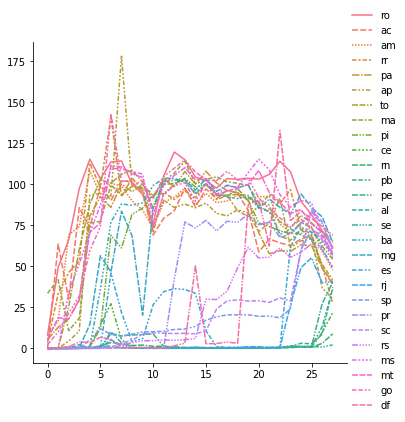

In [ ]:
sns.relplot(kind='line', data=df)

In [ ]:
df_melt = df.melt('ano', value_vars=df.drop('ano', axis=1), var_name='uf', value_name='cv') # cv : cobertura vacinal em %

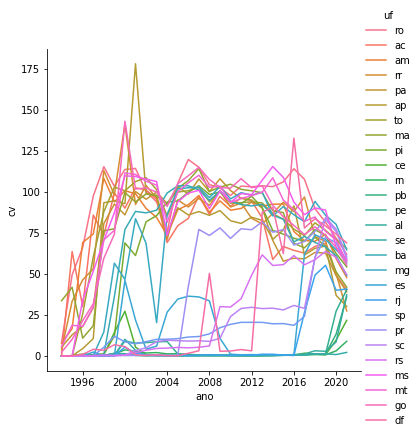

In [ ]:
sns.relplot(data=df_melt, kind='line', hue='uf', x='ano', y='cv')

In [ ]:
df.to_csv('cobertura_vacinal_pivot.csv')
df_melt.to_csv('cobertura_vacinal_melt.csv')

In [ ]:
df.columns

Index(['ano', 'ro', 'ac', 'am', 'rr', 'pa', 'ap', 'to', 'ma', 'pi', 'ce', 'rn',
       'pb', 'pe', 'al', 'se', 'ba', 'mg', 'es', 'rj', 'sp', 'pr', 'sc', 'rs',
       'ms', 'mt', 'go', 'df'],
      dtype='object')